In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [39]:
df.shape

(18265, 16)

In [40]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   Datetime    18265 non-null  object 
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  Benzene     18265 non-null  float64
 12  Toluene     18265 non-null  float64
 13  Xylene      18265 non-null  float64
 14  AQI         18265 non-null  float64
 15  AQI_Bucket  18265 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.2+ MB


In [42]:
df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [43]:
def classify_aqi_bucket(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    elif aqi <= 500:
        return "Severe"
    else:
        return "Beyond Index"

df['Corrected_AQI_Bucket'] = df['AQI'].apply(classify_aqi_bucket)


In [44]:
# CPCB breakpoints (India) for AQI computation
cpcb_breakpoints = {
    "PM2.5": [
        (0, 30, 0, 50),
        (31, 60, 51, 100),
        (61, 90, 101, 200),
        (91, 120, 201, 300),
        (121, 250, 301, 400),
        (251, 350, 401, 500)
    ],
    "PM10": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 250, 101, 200),
        (251, 350, 201, 300),
        (351, 430, 301, 400),
        (431, 500, 401, 500)
    ],
    "NO2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 180, 101, 200),
        (181, 280, 201, 300),
        (281, 400, 301, 400),
        (401, 1000, 401, 500)
    ],
    "SO2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 380, 101, 200),
        (381, 800, 201, 300),
        (801, 1600, 301, 400),
        (1601, 2000, 401, 500)
    ],
    "CO": [
        (0.0, 1.0, 0, 50),
        (1.1, 2.0, 51, 100),
        (2.1, 10.0, 101, 200),
        (10.1, 17.0, 201, 300),
        (17.1, 34.0, 301, 400),
        (34.1, 50.0, 401, 500)
    ],
    "O3": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 168, 101, 200),
        (169, 208, 201, 300),
        (209, 748, 301, 400),
        (749, 1000, 401, 500)
    ],
    "NH3": [
        (0, 200, 0, 50),
        (201, 400, 51, 100),
        (401, 800, 101, 200),
        (801, 1200, 201, 300),
        (1201, 1800, 301, 400),
        (1801, 2400, 401, 500)
    ]
}


In [45]:
def classify_aqi_bucket(aqi):
    if 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Satisfactory"
    elif 101 <= aqi <= 200:
        return "Moderate"
    elif 201 <= aqi <= 300:
        return "Poor"
    elif 301 <= aqi <= 400:
        return "Very Poor"
    elif 401 <= aqi <= 500:
        return "Severe"
    else:
        return "Beyond Index"


In [46]:
def compute_sub_index(value, breakpoints):
    for (low, high, index_low, index_high) in breakpoints:
        if low <= value <= high:
            return ((index_high - index_low) / (high - low)) * (value - low) + index_low
    return None


In [47]:
def calculate_aqi_and_bucket(row):
    sub_indices = []

    for pollutant, breakpoints in cpcb_breakpoints.items():
        value = row.get(pollutant)
        if pd.notnull(value):
            sub_index = compute_sub_index(value, breakpoints)
            if sub_index is not None:
                sub_indices.append(sub_index)

    if sub_indices:
        max_aqi = round(max(sub_indices), 1)
        category = classify_aqi_bucket(max_aqi)
        return pd.Series([max_aqi, category])
    else:
        return pd.Series([None, None])


In [48]:
df[['Corrected_AQI', 'Corrected_AQI_Bucket']] = df.apply(calculate_aqi_and_bucket, axis=1)


In [49]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Corrected_AQI_Bucket,Corrected_AQI
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe,Very Poor,325.8
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory,Poor,262.7
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe,Very Poor,341.8
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor,Poor,206.3
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good,Very Poor,339.8


In [50]:
df.drop(columns=['Benzene','Toluene','Xylene','AQI_Bucket','AQI'],inplace=True)	

In [51]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Corrected_AQI_Bucket,Corrected_AQI
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,Very Poor,325.8
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,Poor,262.7
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,Very Poor,341.8
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,Poor,206.3
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,Very Poor,339.8


In [52]:
df.rename(columns={'Corrected_AQI_Bucket': 'AQI_Bucket','Corrected_AQI':'AQI'}, inplace=True)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI_Bucket,AQI
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,Very Poor,325.8
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,Poor,262.7
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,Very Poor,341.8
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,Poor,206.3
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,Very Poor,339.8


In [55]:
df = df[[col for col in df.columns if col not in ['AQI', 'AQI_Bucket']] + ['AQI', 'AQI_Bucket']]


In [56]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,325.8,Very Poor
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,262.7,Poor
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,341.8,Very Poor
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,206.3,Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,339.8,Very Poor


In [58]:
print(df[(df['City'] == 'Delhi') & (pd.to_datetime(df['Datetime']).between('2015-12-01', '2015-12-30'))][['Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']])


        Datetime  PM2.5   PM10     NO    NO2    NOx   NH3    CO   SO2     O3  \
1670  2015-12-01  197.6  260.4  177.0   52.3  135.9   5.3  7.89   1.1   12.9   
1675  2015-12-02  370.9    3.5   49.5   11.6  228.4   8.6  5.93  44.5  122.4   
1680  2015-12-03  394.8  555.9   50.0    5.3  229.3  18.7  9.27  76.9   17.5   
1685  2015-12-04  438.5   13.9  115.5   96.9   37.1  17.7  4.55  24.2  121.0   
1690  2015-12-05  411.3  396.3   97.2   80.6  140.4   6.3  4.48  11.5  132.3   
1695  2015-12-06  241.4   22.2  102.0  112.9   74.6   4.3  7.13  13.8   62.7   
1700  2015-12-07   11.1  297.6  143.5   85.6  246.0  49.8  6.48  46.1  124.6   
1705  2015-12-08  363.8  331.2    4.8  105.2  194.2   4.7  4.89  48.4   55.3   
1710  2015-12-09  404.3   22.6  178.8   89.9   27.5  33.4  4.57  12.4  175.1   
1715  2015-12-10   50.3  539.3  192.8   91.1   18.5   0.8  6.58  47.6   40.2   
1720  2015-12-11  163.1  573.4  123.6  113.6   63.3  15.2  5.30  67.7   74.3   
1725  2015-12-12  393.4  145.0  152.4   

In [59]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df['Year']=df['Datetime'].dt.year
df['Month']=df['Datetime'].dt.month
df['Day']=df['Datetime'].dt.day
df['Weekday']=df['Datetime'].dt.day_name()


In [60]:
df[['Datetime', 'Year', 'Month', 'Day', 'Weekday']].tail()

,Datetime,Year,Month,Day,Weekday
18260,2024-12-31,2024,12,31,Tuesday
18261,2024-12-31,2024,12,31,Tuesday
18262,2024-12-31,2024,12,31,Tuesday
18263,2024-12-31,2024,12,31,Tuesday
18264,2024-12-31,2024,12,31,Tuesday


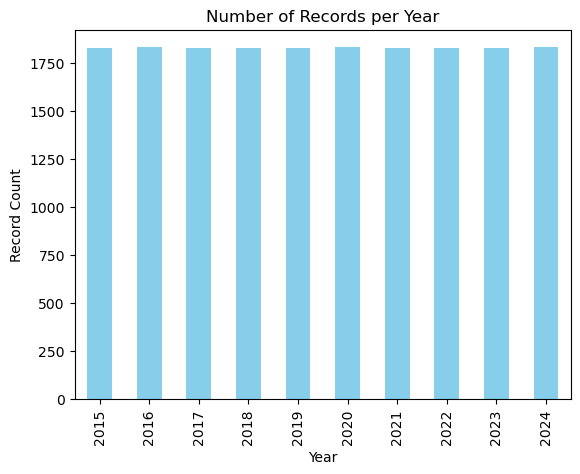

In [61]:
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Record Count")
plt.show()

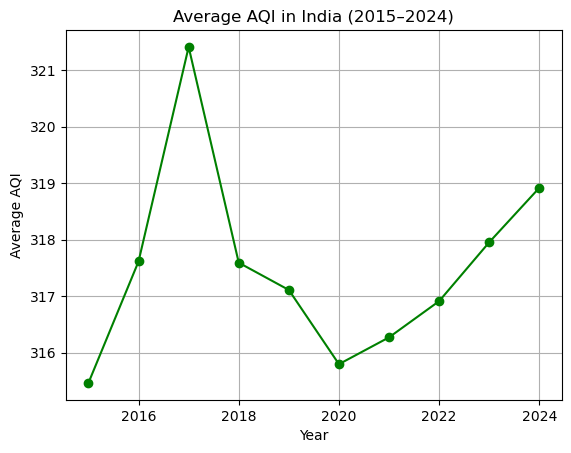

In [62]:
df.groupby('Year')['AQI'].mean().plot(kind='line', marker='o', color='green')
plt.title('Average AQI in India (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()




In [82]:
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

city_avg_aqi


City
Mumbai       318.184834
Kolkata      317.726992
Delhi        317.724719
Bangalore    317.270271
Chennai      316.619244
Name: AQI, dtype: float64

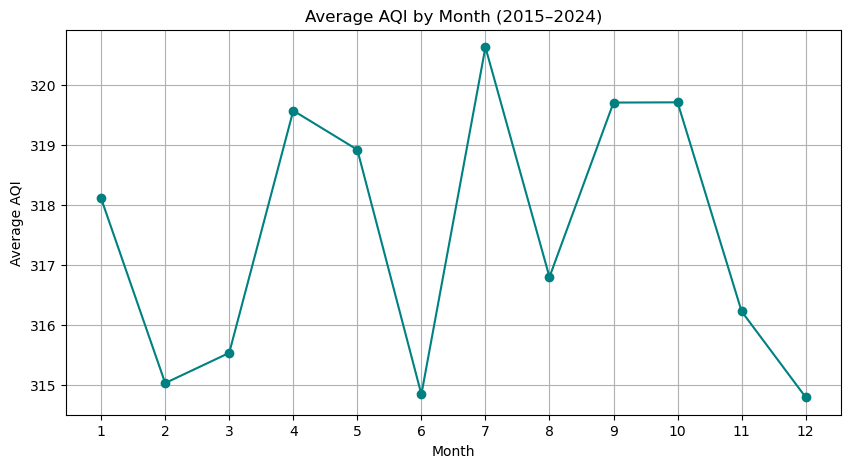

In [65]:
monthly_avg_aqi = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(10,5))
monthly_avg_aqi.plot(kind='line', marker='o', color='teal')
plt.title('Average AQI by Month (2015–2024)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()


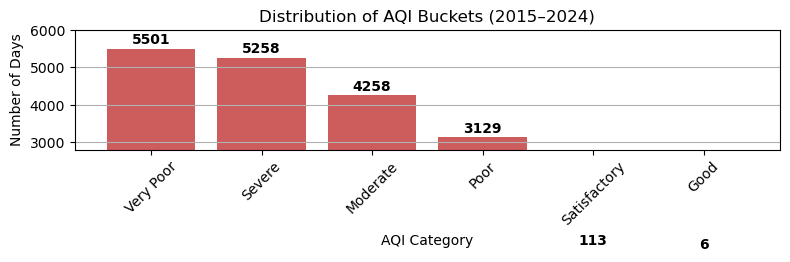

In [67]:
bucket_counts = df['AQI_Bucket'].value_counts()

plt.figure(figsize=(8,5))
bars = plt.bar(bucket_counts.index, bucket_counts.values, color='indianred')
plt.title('Distribution of AQI Buckets (2015–2024)')
plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.ylim(2800,6000)
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


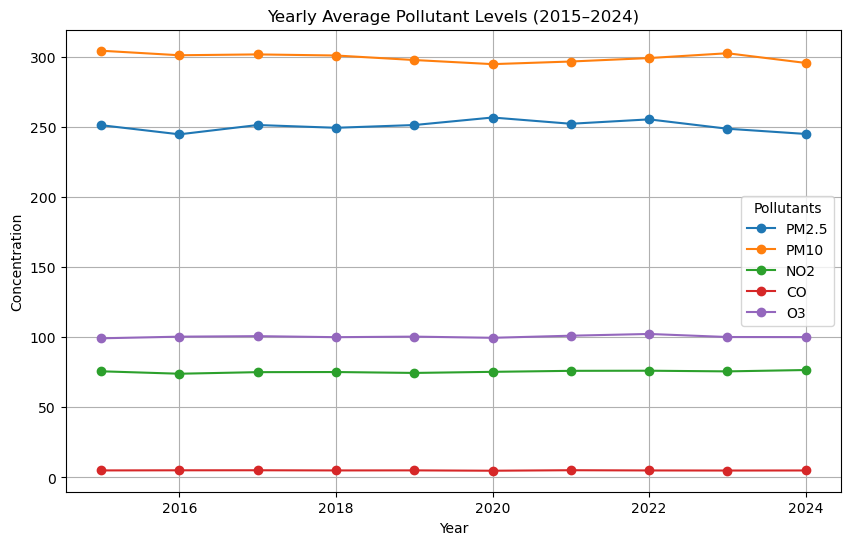

In [68]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
df_pollutants = df.groupby('Year')[pollutants].mean()

df_pollutants.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Yearly Average Pollutant Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.grid(True)
plt.legend(title='Pollutants')
plt.show()


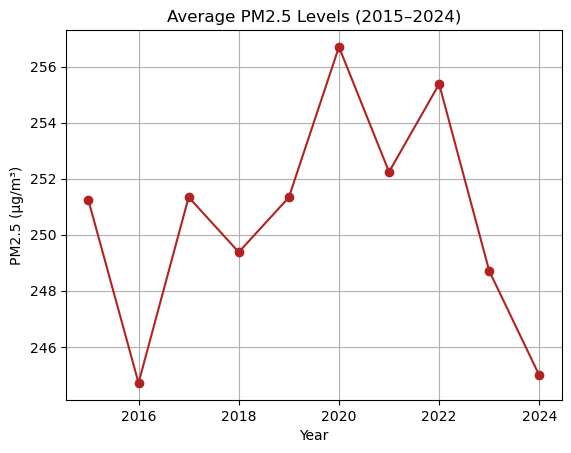

In [69]:
df.groupby('Year')['PM2.5'].mean().plot(kind='line', marker='o', color='firebrick')
plt.title('Average PM2.5 Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

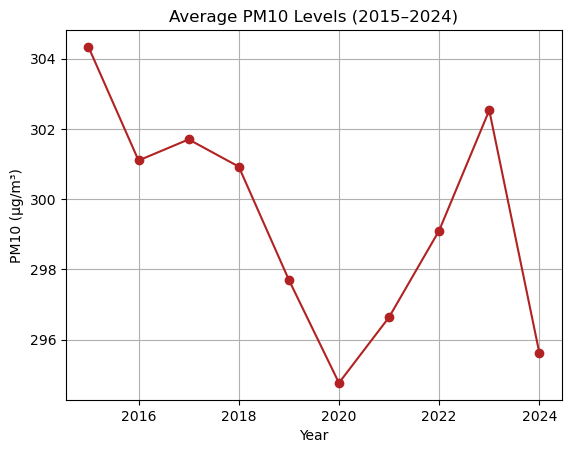

In [70]:
df.groupby('Year')['PM10'].mean().plot(kind='line', marker='o', color='firebrick')
plt.title('Average PM10 Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()

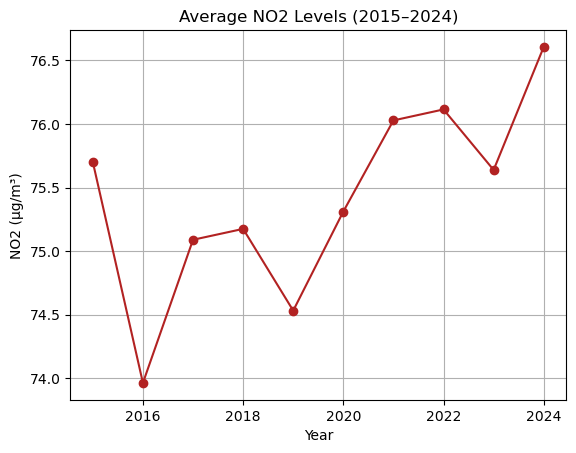

In [71]:
df.groupby('Year')['NO2'].mean().plot(kind='line', marker='o', color='firebrick')
plt.title('Average NO2 Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()

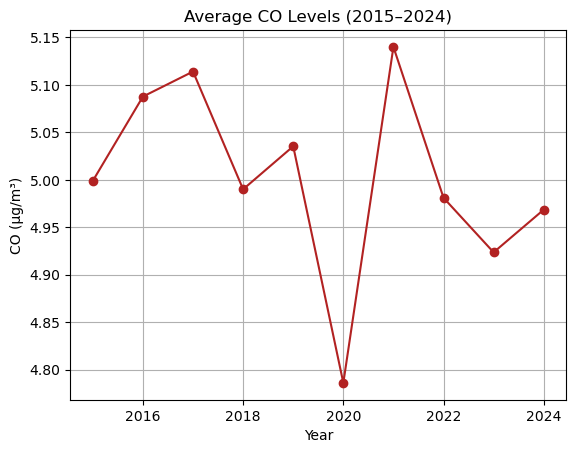

In [72]:
df.groupby('Year')['CO'].mean().plot(kind='line', marker='o', color='firebrick')
plt.title('Average CO Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('CO (µg/m³)')
plt.grid(True)
plt.show()

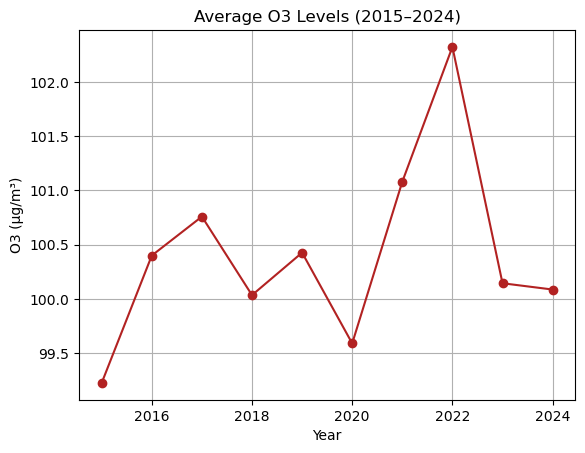

In [73]:
df.groupby('Year')['O3'].mean().plot(kind='line', marker='o', color='firebrick')
plt.title('Average O3 Levels (2015–2024)')
plt.xlabel('Year')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)
plt.show()

In [74]:
!pip install scikit-learn



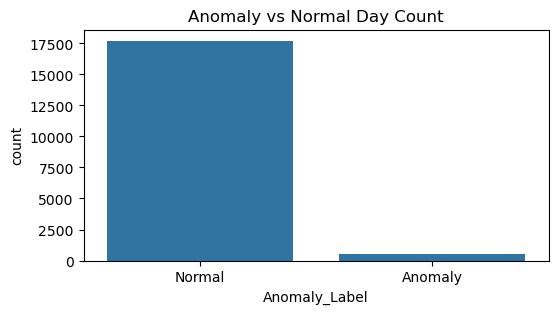

Sample Anomalies Detected:
      Datetime       City  PM2.5   PM10    NO2    CO   SO2     O3
57  2015-01-12    Chennai  391.2   24.4  133.3  9.57   6.3  176.9
152 2015-01-31    Chennai   18.5  301.8  135.2  0.11  97.6  168.6
155 2015-02-01      Delhi    4.2  172.2    0.9  2.99  91.0   36.4
197 2015-02-09    Chennai    7.6  584.2   71.9  0.85  69.7   29.0
287 2015-02-27    Chennai   43.6  547.5    3.4  9.88  82.6  157.3
288 2015-02-27    Kolkata   80.7   33.4  149.3  0.03  86.8   36.0
394 2015-03-20  Bangalore   17.5  395.7  143.2  9.41   1.0   69.0
427 2015-03-27    Chennai   14.2  557.4  111.3  3.78  96.1  190.7
482 2015-04-07    Chennai  233.4  577.7  137.3  9.75  38.2  195.9
487 2015-04-08    Chennai  323.7  580.8  146.4  0.02   1.4  193.1


In [265]:
# Anomaly Detection on Air Quality Data using IsolationForest

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']


X = df[pollutants]


model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
df['Anomaly'] = model.fit_predict(X)

# -1 = anomaly, 1 = normal
df['Anomaly_Label'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# --- Visualize Anomaly Count ---
plt.figure(figsize=(6,3))
sns.countplot(x='Anomaly_Label', data=df)
plt.title('Anomaly vs Normal Day Count')
plt.show()

# --- View Some Anomalies ---
print("Sample Anomalies Detected:")
print(df[df['Anomaly'] == -1][['Datetime', 'City'] + pollutants].head(10))



 Top 5 Worst Anomaly Days:
        Datetime       City  Pollution_Sum  PM2.5   PM10    NO2    CO   SO2  \
16050 2023-10-16      Delhi        1453.16  497.9  544.9  147.6  6.56  74.8   
16213 2023-11-17    Kolkata        1435.29  442.5  553.2  139.4  3.29  98.2   
2655  2016-06-15      Delhi        1426.85  407.6  590.7  144.2  2.45  84.8   
10246 2020-08-11     Mumbai        1426.29  488.6  576.4   61.3  9.59  98.4   
11689 2021-05-26  Bangalore        1426.18  475.1  547.6  114.5  9.98  90.2   

          O3  
16050  181.4  
16213  198.7  
2655   197.1  
10246  192.0  
11689  188.8  


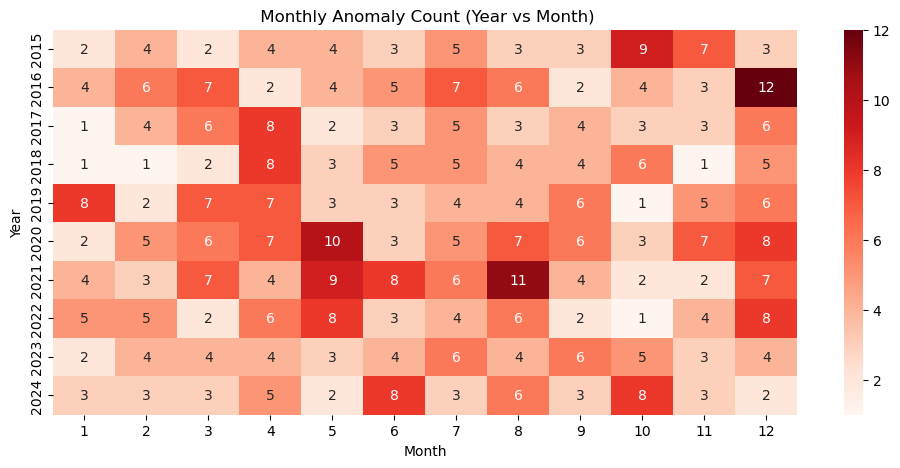

In [266]:
# --- 3. Top 5 Most Anomalous Days (Based on Pollution Sum) ---
df['Pollution_Sum'] = df[pollutants].sum(axis=1)
top_anomalies = df[df['Anomaly'] == -1].sort_values(by='Pollution_Sum', ascending=False).head(5)
print(" Top 5 Worst Anomaly Days:")
print(top_anomalies[['Datetime', 'City', 'Pollution_Sum'] + pollutants])

# --- 4. Monthly Anomaly Trend ---
monthly_anomaly_trend = df.groupby(['Year', 'Month'])['Anomaly'].apply(lambda x: (x == -1).sum())
monthly_anomaly_trend = monthly_anomaly_trend.unstack().fillna(0)

plt.figure(figsize=(12,5))
sns.heatmap(monthly_anomaly_trend, cmap='Reds', annot=True, fmt='.0f')
plt.title(" Monthly Anomaly Count (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [276]:
df_original = df.iloc[:, :13] 
df_original.to_csv("Air_quality_data.csv", index=False)


In [271]:
import os
os.getcwd()


'C:\\Users\\iseke'

In [272]:
df.to_csv("modified_air_quality_data.csv", index=False)


In [273]:
print(os.path.isfile("modified_air_quality_data.csv"))


True


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   City                18265 non-null  object        
 1   Datetime            18265 non-null  datetime64[ns]
 2   PM2.5               18265 non-null  float64       
 3   PM10                18265 non-null  float64       
 4   NO                  18265 non-null  float64       
 5   NO2                 18265 non-null  float64       
 6   NOx                 18265 non-null  float64       
 7   NH3                 18265 non-null  float64       
 8   CO                  18265 non-null  float64       
 9   SO2                 18265 non-null  float64       
 10  O3                  18265 non-null  float64       
 11  AQI                 18265 non-null  float64       
 12  AQI_Bucket          18265 non-null  object        
 13  Year                18265 non-null  int32     